In [17]:
# Import packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataframe
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# Train/Test split
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% of the data reserved for the test set
    random_state=412,      # Fix the random seed for reproducibility
    shuffle=True,         # Shuffle the dataset before splitting (recommended)
    stratify=y            # Preserve the target class distribution
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(), y_test.value_counts())


# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(120, 4) (30, 4)
target
0    40
2    40
1    40
Name: count, dtype: int64 target
0    10
2    10
1    10
Name: count, dtype: int64


Best k based on test accuracy: 1


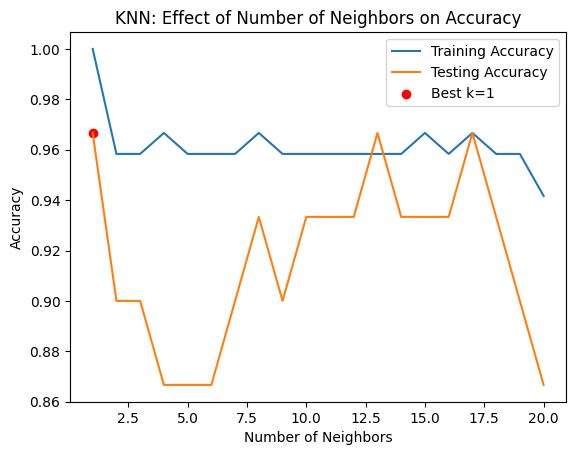

Test Accuracy (k=1): 0.9666666666666667
     Actual  Predicted_k1
1         0             0
126       2             2
77        1             1
103       2             2
26        0             0


In [19]:
# Test different k values and record accuracies
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 21)   # Test k from 1 to 20
train_accuracies = []
test_accuracies = []

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))


# Plot KNN accuracy vs number of neighbors and find the best k
best_k = neighbors[test_accuracies.index(max(test_accuracies))]
print(f"Best k based on test accuracy: {best_k}")
plt.title("KNN: Effect of Number of Neighbors on Accuracy")
plt.plot(neighbors, train_accuracies, label="Training Accuracy")
plt.plot(neighbors, test_accuracies, label="Testing Accuracy")
plt.scatter(best_k, test_accuracies[test_accuracies.index(max(test_accuracies))],
            color='red', label=f"Best k={best_k}")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


# Accuracy test
from sklearn.metrics import accuracy_score
knn_best_k = KNeighborsClassifier(n_neighbors=best_k)   # KNN model with the best k
knn_best_k.fit(X_train_scaled, y_train)
knn_pred_best_k = knn_best_k.predict(X_test_scaled)   # Make predictions on the test set
print(f"Test Accuracy (k={best_k}): {accuracy_score(y_test, knn_pred_best_k)}")


# Show the results
df_results = pd.DataFrame({
    "Actual": y_test,
    f"Predicted_k{best_k}": knn_pred_best_k
})
print(df_results.head())